# The Sparks Foundation - Data Science & Business Analytics Internship

## TASK 2 - Prediction using Unsupervised Machine Learning
In this task it is required to predict the optimum number of cluster for the iris data set .iris data set consists of 3 types of flower namely Iris-setosa Iris-versicolour and Iris-virginica

#### Steps :

- Step 1 - Importing the dataset
- Step 2 - Visualize the data  
- Step 3 - Finding the optimum number of clusters
- Step 4 - Applying k means clustering on the data
- Step 5 - Visualize the clusters

In [2]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Ignore Warnings

import warnings as wg
wg.filterwarnings("ignore")

In [2]:
# Reading the Iris.csv file and 
# Storing the Data into a DatFrame df.

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking how many rows and columns does the df contain.

df.shape

(150, 6)

In [39]:
# Checking the column names of df.

df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [40]:
# Generate descriptive statistics

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [41]:
# Concise summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
# Copy the df DataFrame into a new DataFrame 
# called iris_df dropping 'Id' & 'Species' columns

iris_df = df.copy()
iris_df = iris_df.drop(columns = ['Id','Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# Check For Duplicates

iris_df.duplicated().sum()

3

In [38]:
# Dropping the Duplicate Rows

print(iris_df.shape)
iris_df.drop_duplicates(inplace=True)
print(iris_df.shape)

(150, 4)
(147, 4)


In [8]:
sum_of_square = []
clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters = k)
    km.fit(iris_df)
    sum_of_square.append(km.inertia_)

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=1.85)

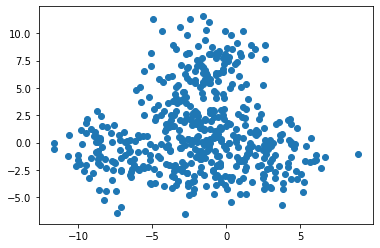

In [5]:
plt.scatter(data[0][:,0],data[0][:,1])

In [14]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 5)
k.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
k.cluster_centers_

array([[-1.2112476 ,  7.40982394],
       [-7.76140873, -1.01408433],
       [ 3.01236822, -1.09462287],
       [-2.06137297,  2.27944309],
       [-2.011725  , -2.31172627]])

In [16]:
k.labels_

array([0, 3, 1, 3, 2, 2, 1, 1, 1, 3, 4, 1, 2, 0, 1, 2, 0, 0, 4, 1, 3, 3,
       3, 1, 2, 0, 3, 1, 4, 2, 0, 3, 2, 4, 2, 4, 2, 0, 0, 4, 2, 3, 4, 0,
       2, 0, 4, 3, 2, 4, 3, 2, 3, 3, 3, 4, 4, 4, 0, 3, 1, 3, 3, 0, 3, 0,
       0, 1, 4, 4, 2, 3, 3, 3, 0, 3, 1, 1, 2, 1, 2, 0, 4, 1, 1, 3, 4, 4,
       0, 0, 3, 0, 1, 1, 3, 0, 1, 1, 3, 4, 2, 1, 4, 0, 4, 3, 0, 4, 2, 0,
       2, 0, 1, 3, 0, 2, 4, 0, 4, 3, 3, 2, 4, 0, 2, 0, 3, 0, 2, 4, 1, 1,
       2, 4, 4, 0, 2, 4, 4, 1, 4, 3, 3, 1, 2, 1, 2, 2, 0, 1, 4, 0, 4, 1,
       2, 3, 1, 3, 0, 3, 1, 2, 3, 4, 2, 0, 0, 1, 4, 0, 4, 2, 1, 4, 3, 2,
       4, 4, 1, 2, 3, 1, 3, 0, 4, 4, 1, 4, 3, 2, 3, 2, 3, 2, 3, 3, 4, 1,
       2, 1, 0, 1, 3, 3, 3, 3, 0, 1, 2, 4, 2, 3, 4, 2, 1, 1, 2, 0, 0, 3,
       4, 2, 0, 0, 4, 1, 0, 2, 1, 4, 1, 3, 3, 0, 0, 0, 0, 1, 4, 0, 1, 1,
       4, 0, 3, 2, 2, 1, 2, 2, 3, 4, 3, 1, 3, 0, 4, 0, 4, 2, 2, 2, 3, 1,
       0, 3, 3, 2, 4, 2, 1, 1, 0, 2, 1, 3, 2, 1, 3, 2, 1, 3, 4, 1, 3, 3,
       1, 0, 3, 1, 4, 3, 4, 4, 3, 3, 3, 4, 2, 4, 2,

In [17]:
data[1]

array([4, 0, 3, 0, 2, 2, 3, 3, 3, 0, 1, 1, 2, 4, 3, 2, 4, 4, 0, 3, 0, 1,
       2, 3, 2, 4, 3, 3, 1, 2, 4, 0, 2, 1, 1, 0, 2, 4, 4, 1, 2, 4, 1, 4,
       2, 4, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 4, 0, 3, 0, 0, 4, 0, 4,
       4, 3, 1, 2, 2, 1, 4, 0, 4, 0, 3, 3, 2, 3, 2, 4, 1, 3, 3, 0, 1, 1,
       4, 4, 0, 4, 3, 3, 0, 4, 3, 3, 2, 0, 1, 3, 3, 4, 1, 0, 4, 1, 2, 4,
       2, 4, 3, 0, 4, 2, 1, 4, 1, 0, 2, 2, 1, 4, 2, 4, 1, 4, 2, 1, 3, 3,
       2, 1, 3, 4, 2, 1, 1, 3, 1, 1, 0, 3, 2, 3, 0, 2, 4, 3, 2, 4, 0, 3,
       2, 0, 3, 1, 4, 0, 3, 2, 0, 0, 2, 0, 4, 3, 0, 4, 3, 2, 3, 3, 4, 2,
       3, 1, 3, 0, 0, 3, 0, 4, 2, 1, 3, 0, 0, 2, 4, 2, 0, 2, 0, 1, 1, 3,
       2, 1, 4, 3, 0, 4, 1, 1, 4, 3, 2, 1, 2, 0, 1, 0, 3, 3, 2, 4, 4, 0,
       1, 2, 4, 4, 1, 3, 0, 1, 3, 0, 3, 0, 1, 4, 4, 4, 4, 3, 1, 4, 3, 3,
       3, 4, 0, 2, 1, 3, 2, 2, 1, 1, 0, 3, 0, 4, 1, 4, 2, 2, 2, 1, 0, 3,
       4, 1, 1, 0, 1, 2, 3, 3, 4, 2, 3, 4, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1,
       3, 4, 0, 3, 1, 0, 1, 3, 1, 0, 1, 1, 0, 1, 2,

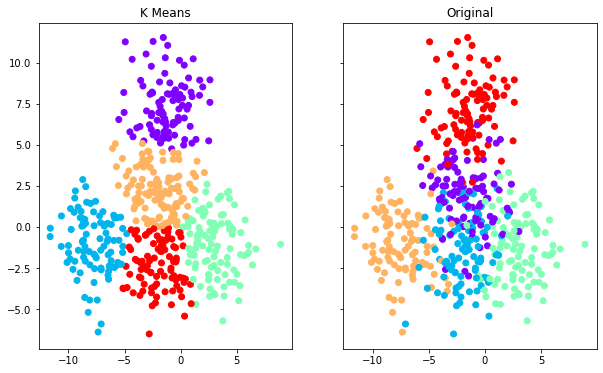

In [18]:
fig , (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1], c = k.labels_, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1], c = data[1], cmap='rainbow')